## Objective: Pre-process images for use in the model.

## Redimentionement

In [8]:
import os
import cv2

def resize_and_save_images(input_dir, output_dir, target_size=(224, 224)):
    """
    Redimensionne toutes les images dans input_dir et les sauvegarde dans output_dir
    tout en préservant la structure des dossiers.
    
    Args:
        input_dir (str): Chemin vers le dossier contenant les images originales.
        output_dir (str): Chemin vers le dossier où sauvegarder les images redimensionnées.
        target_size (tuple): Taille cible des images (largeur, hauteur).
    """
    if not os.path.exists(output_dir):
        os.makedirs(output_dir)  # Crée le dossier de sortie s'il n'existe pas

    for dataset_type in ['train', 'val', 'test']:
        input_dataset_dir = os.path.join(input_dir, dataset_type)
        output_dataset_dir = os.path.join(output_dir, dataset_type)

        # Vérifier que le dossier d'entrée existe
        if not os.path.exists(input_dataset_dir):
            print(f"Le dossier {input_dataset_dir} n'existe pas. Ignoré.")
            continue

        for class_name in ['NORMAL', 'PNEUMONIA']:
            input_class_dir = os.path.join(input_dataset_dir, class_name)
            output_class_dir = os.path.join(output_dataset_dir, class_name)

            if not os.path.exists(input_class_dir):
                print(f"Le dossier {input_class_dir} n'existe pas. Ignoré.")
                continue

            if not os.path.exists(output_class_dir):
                os.makedirs(output_class_dir)  # Crée le dossier de sortie pour la classe

            # Parcourir toutes les images de la classe
            for img_name in os.listdir(input_class_dir):
                img_path = os.path.join(input_class_dir, img_name)
                img = cv2.imread(img_path)

                if img is None:  # Vérifier si l'image est valide
                    print(f"Erreur lors du chargement de l'image : {img_path}. Ignorée.")
                    continue

                # Redimensionner l'image
                resized_img = cv2.resize(img, target_size)

                # Sauvegarder l'image redimensionnée
                output_path = os.path.join(output_class_dir, img_name)
                cv2.imwrite(output_path, resized_img)
                print(f"Image sauvegardée : {output_path}")

# Chemins des dossiers
input_data_dir = r"C:\Users\marti\Desktop\dataof\Caption2_Deep_Learning\Data"
output_data_dir = r"C:\Users\marti\Desktop\dataof\Caption2_Deep_Learning\Data_224"

# Exécuter la fonction
resize_and_save_images(input_data_dir, output_data_dir)


Image sauvegardée : C:\Users\marti\Desktop\dataof\Caption2_Deep_Learning\Data_224\train\NORMAL\IM-0115-0001.jpeg
Image sauvegardée : C:\Users\marti\Desktop\dataof\Caption2_Deep_Learning\Data_224\train\NORMAL\IM-0117-0001.jpeg
Image sauvegardée : C:\Users\marti\Desktop\dataof\Caption2_Deep_Learning\Data_224\train\NORMAL\IM-0119-0001.jpeg
Image sauvegardée : C:\Users\marti\Desktop\dataof\Caption2_Deep_Learning\Data_224\train\NORMAL\IM-0122-0001.jpeg
Image sauvegardée : C:\Users\marti\Desktop\dataof\Caption2_Deep_Learning\Data_224\train\NORMAL\IM-0125-0001.jpeg
Image sauvegardée : C:\Users\marti\Desktop\dataof\Caption2_Deep_Learning\Data_224\train\NORMAL\IM-0127-0001.jpeg
Image sauvegardée : C:\Users\marti\Desktop\dataof\Caption2_Deep_Learning\Data_224\train\NORMAL\IM-0128-0001.jpeg
Image sauvegardée : C:\Users\marti\Desktop\dataof\Caption2_Deep_Learning\Data_224\train\NORMAL\IM-0129-0001.jpeg
Image sauvegardée : C:\Users\marti\Desktop\dataof\Caption2_Deep_Learning\Data_224\train\NORMAL\I

## Afficher quelques images , pour verification 

Train Images:


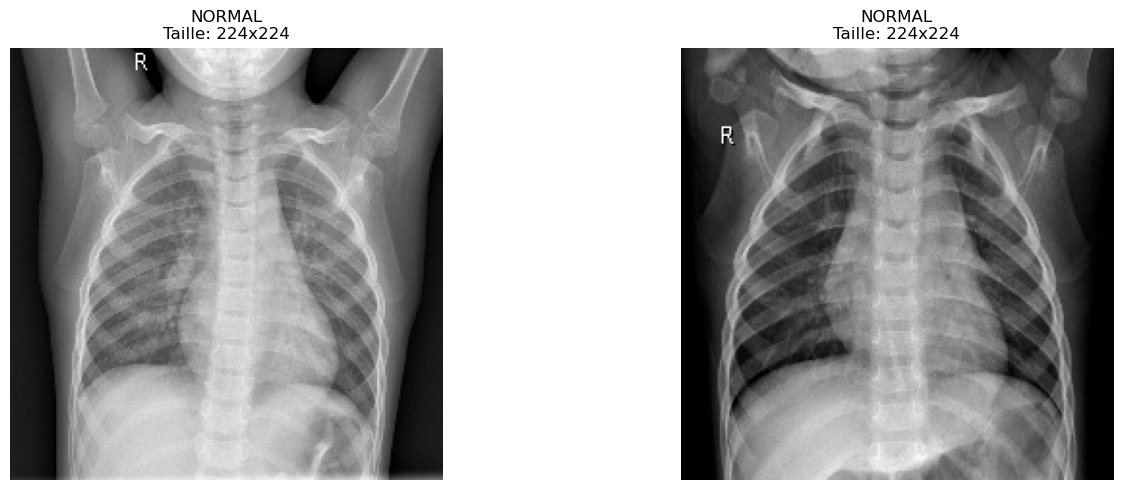

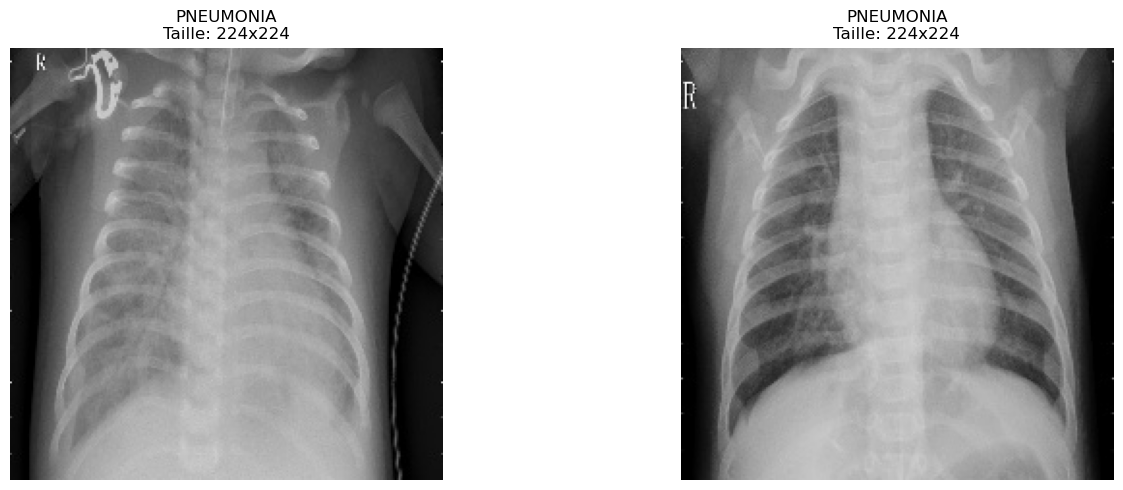

Validation Images:


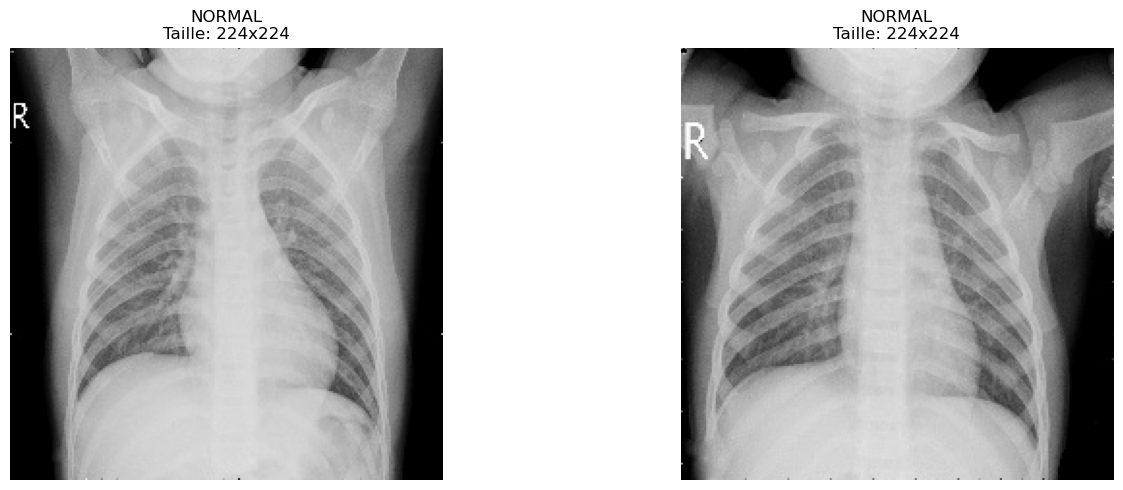

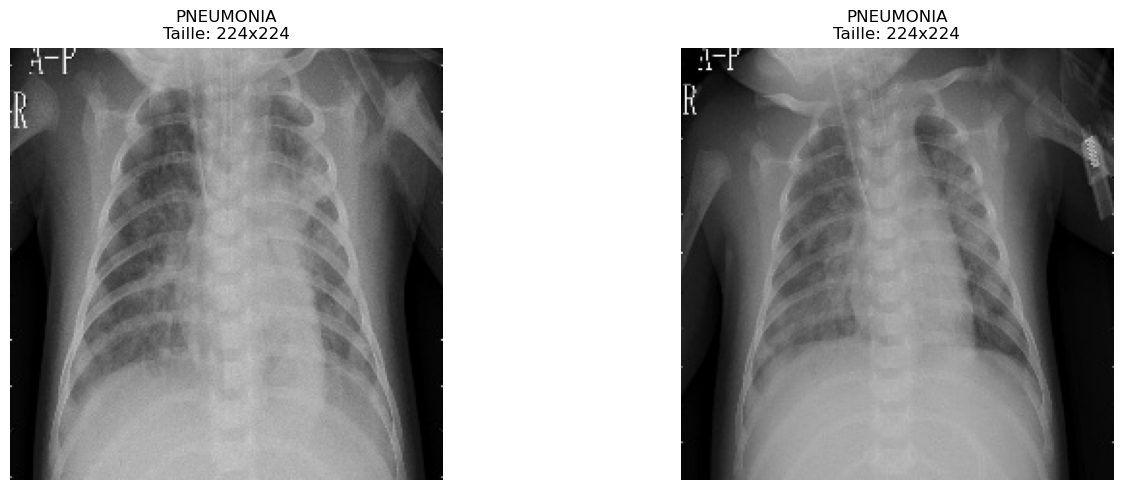

Test Images:


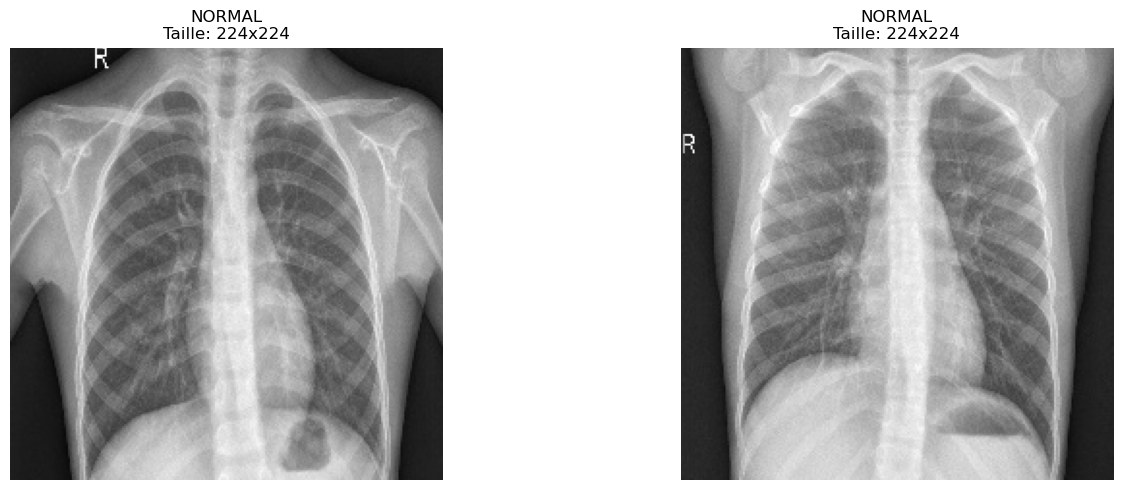

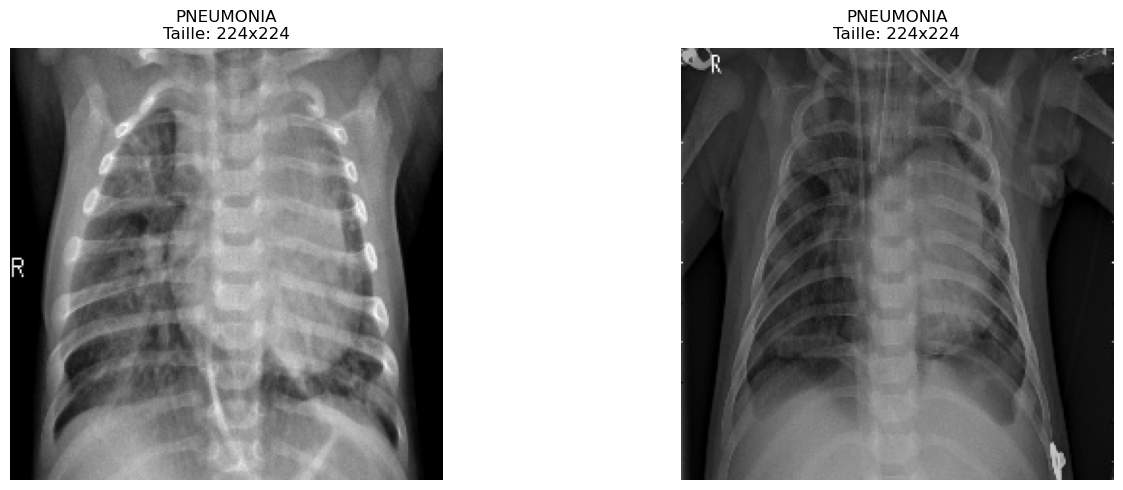

In [9]:
import os
import cv2
import matplotlib.pyplot as plt

# Fonction pour afficher des images à partir d'un dossier avec leurs tailles
def display_images_with_sizes(base_dir, class_names, num_images_per_class=2):
    """
    Affiche des images à partir d'un dossier en précisant leurs tailles.
    
    Args:
        base_dir (str): Chemin du dossier contenant les sous-dossiers des classes.
        class_names (list): Liste des noms des classes (ex: ["NORMAL", "PNEUMONIA"]).
        num_images_per_class (int): Nombre d'images à afficher par classe.
    """
    for class_name in class_names:
        # Chemin vers le sous-dossier de la classe
        class_dir = os.path.join(base_dir, class_name)
        if not os.path.exists(class_dir):
            print(f"Dossier introuvable : {class_dir}")
            continue

        images = os.listdir(class_dir)[:num_images_per_class]  # Prendre les premières images

        # Lire et afficher les images
        fig, axes = plt.subplots(1, num_images_per_class, figsize=(15, 5))
        for i, img_name in enumerate(images):
            img_path = os.path.join(class_dir, img_name)
            img = cv2.imread(img_path)
            if img is None:
                print(f"Impossible de lire l'image : {img_path}")
                continue
            
            img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convertir BGR -> RGB pour l'affichage

            # Obtenir la taille de l'image
            height, width, _ = img.shape

            # Afficher l'image avec sa taille
            axes[i].imshow(img_rgb)
            axes[i].set_title(f"{class_name}\nTaille: {width}x{height}")
            axes[i].axis("off")
        plt.tight_layout()
        plt.show()

# Chemins vers les dossiers redimensionnés
base_data_dir = r"C:\Users\marti\Desktop\dataof\Caption2_Deep_Learning\Data_224"
train_dir = os.path.join(base_data_dir, "train")
val_dir = os.path.join(base_data_dir, "val")
test_dir = os.path.join(base_data_dir, "test")

# Noms des classes (les sous-dossiers doivent être nommés "NORMAL" et "PNEUMONIA")
class_names = ["NORMAL", "PNEUMONIA"]

# Afficher les images pour train
print("Train Images:")
display_images_with_sizes(train_dir, class_names)

# Afficher les images pour validation
print("Validation Images:")
display_images_with_sizes(val_dir, class_names)

# Afficher les images pour test
print("Test Images:")
display_images_with_sizes(test_dir, class_names)


## Augmentation des donnees et preparation des generateurs

In [12]:
import os
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Chemins locaux
data_dir = r"C:\Users\marti\Desktop\dataof\Caption2_Deep_Learning\Data_224"
train_dir = os.path.join(data_dir, "train")
val_dir = os.path.join(data_dir, "val")
test_dir = os.path.join(data_dir, "test")

# Configuration de traitement des images
IMG_SIZE = (224, 224)
BATCH_SIZE = 32

# Augmentation des données pour l'entraînement
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode="nearest"
)

# Préparation des ensembles de données
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode="binary"
)

val_datagen = ImageDataGenerator(rescale=1./255)
val_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode="binary"
)

test_datagen = ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode="binary"
)


Found 5216 images belonging to 2 classes.
Found 16 images belonging to 2 classes.
Found 624 images belonging to 2 classes.
